In [1]:
#Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import os

In [2]:
#Folder Path
cwd = os.getcwd()
cwd

'C:\\Users\\zpap\\OneDrive - AholdDelhaize.com\\Personal elements\\04. Dimokritos_Files\\2nd SEMESTER\\Applied Data Science\\Project\\Python\\Final Versions'

In [3]:
#Replace values from \ to /
path=cwd.replace("\\","/")
print(path)

C:/Users/zpap/OneDrive - AholdDelhaize.com/Personal elements/04. Dimokritos_Files/2nd SEMESTER/Applied Data Science/Project/Python/Final Versions


In [4]:
filename="/seeds_dataset.csv"

df_path=path+filename
print(df_path)

C:/Users/zpap/OneDrive - AholdDelhaize.com/Personal elements/04. Dimokritos_Files/2nd SEMESTER/Applied Data Science/Project/Python/Final Versions/seeds_dataset.csv


In [5]:
df = pd.read_csv(df_path)
df

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
df.dtypes

Area                       float64
Perimeter                  float64
Compactness                float64
Length_of_kernel           float64
Width_of_kernel            float64
Asymmetry_coefficient      float64
Length_of_kernel_groove    float64
Class                        int64
dtype: object

In [8]:
df.describe()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
df.Class.value_counts() # Balanced dataset

1    70
2    70
3    70
Name: Class, dtype: int64

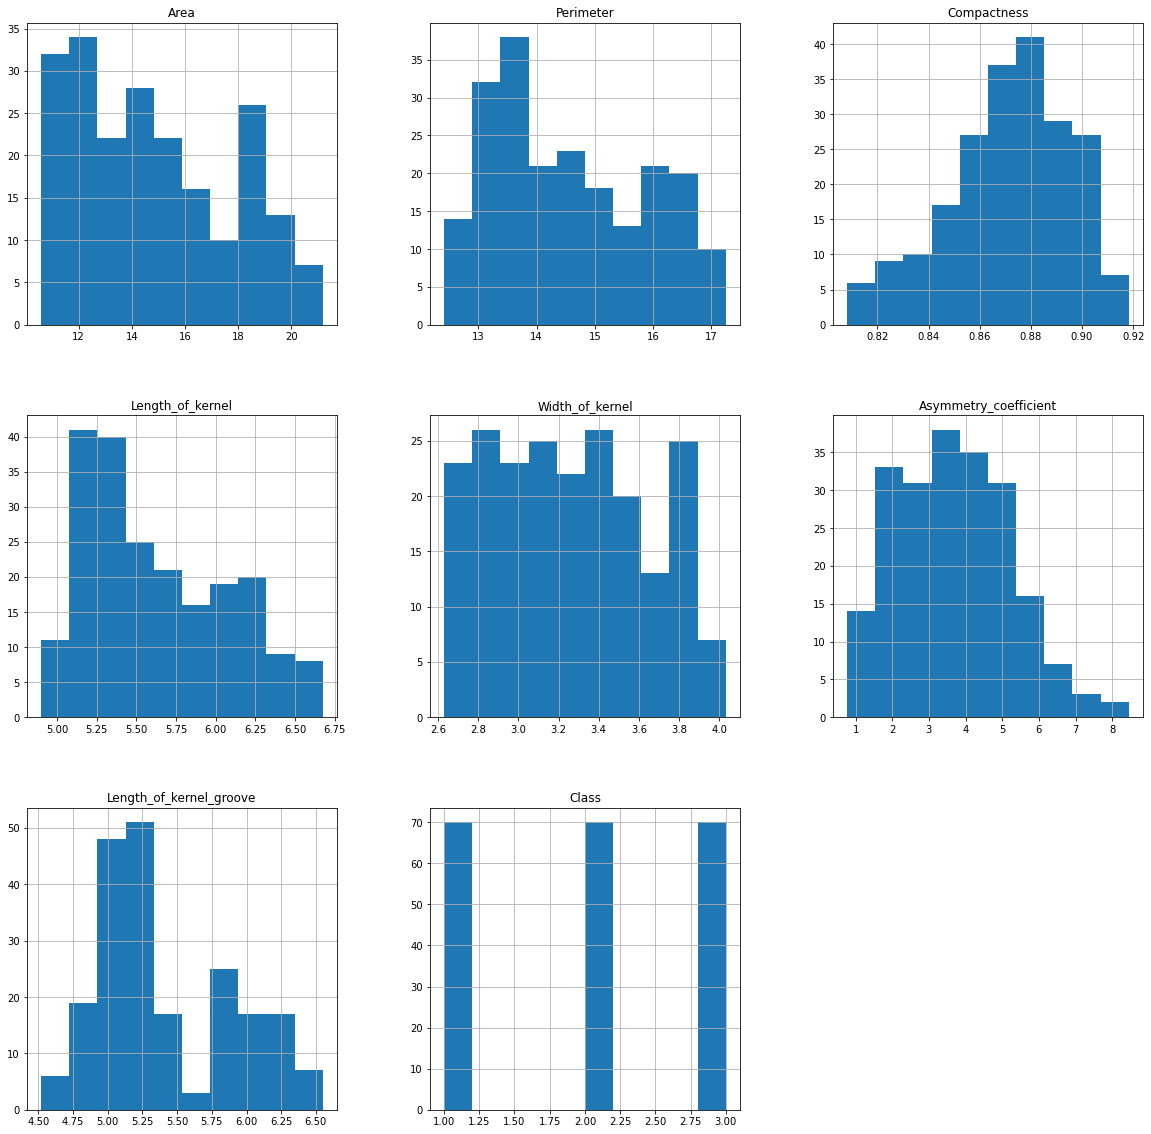

In [10]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

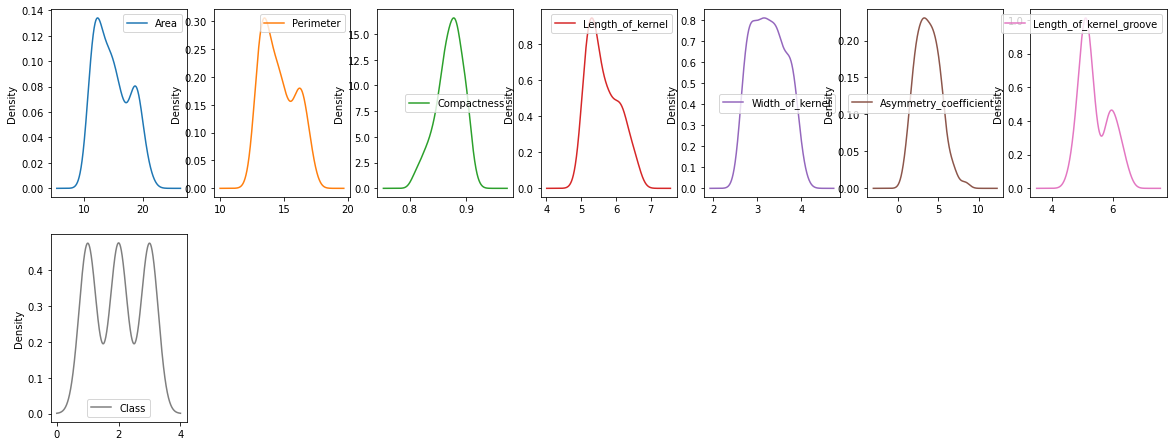

In [11]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [12]:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class                      0
dtype: int64

In [13]:
df.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class                      0
dtype: int64

In [14]:
duplicate_values = df[df.duplicated()]
duplicate_values

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class


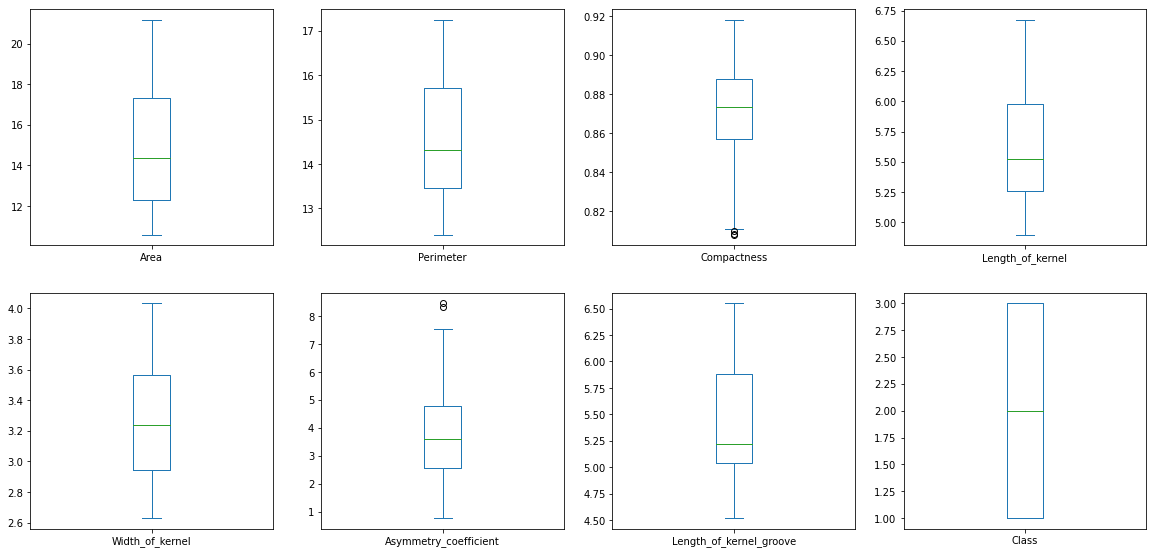

In [15]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

In [16]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'Class').index
columns

Index(['Class', 'Asymmetry_coefficient', 'Length_of_kernel_groove',
       'Length_of_kernel', 'Perimeter'],
      dtype='object')

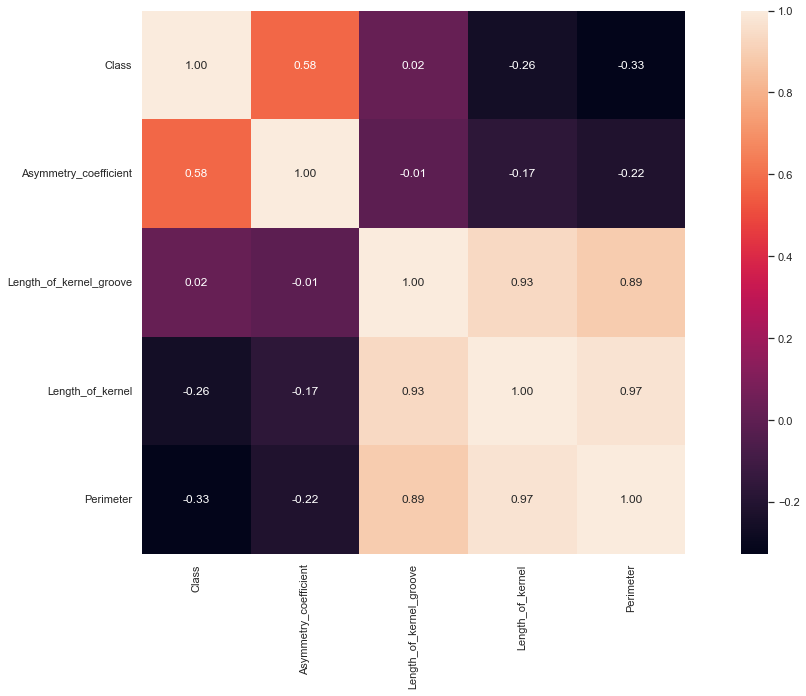

In [17]:
f = plt.figure(figsize=(20, 10))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [18]:
values = df.values

X = values[:,0:7]
Y = values[:,7]

##### Feature Scaling 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [20]:
df_scaled = pd.DataFrame(X_scaled)

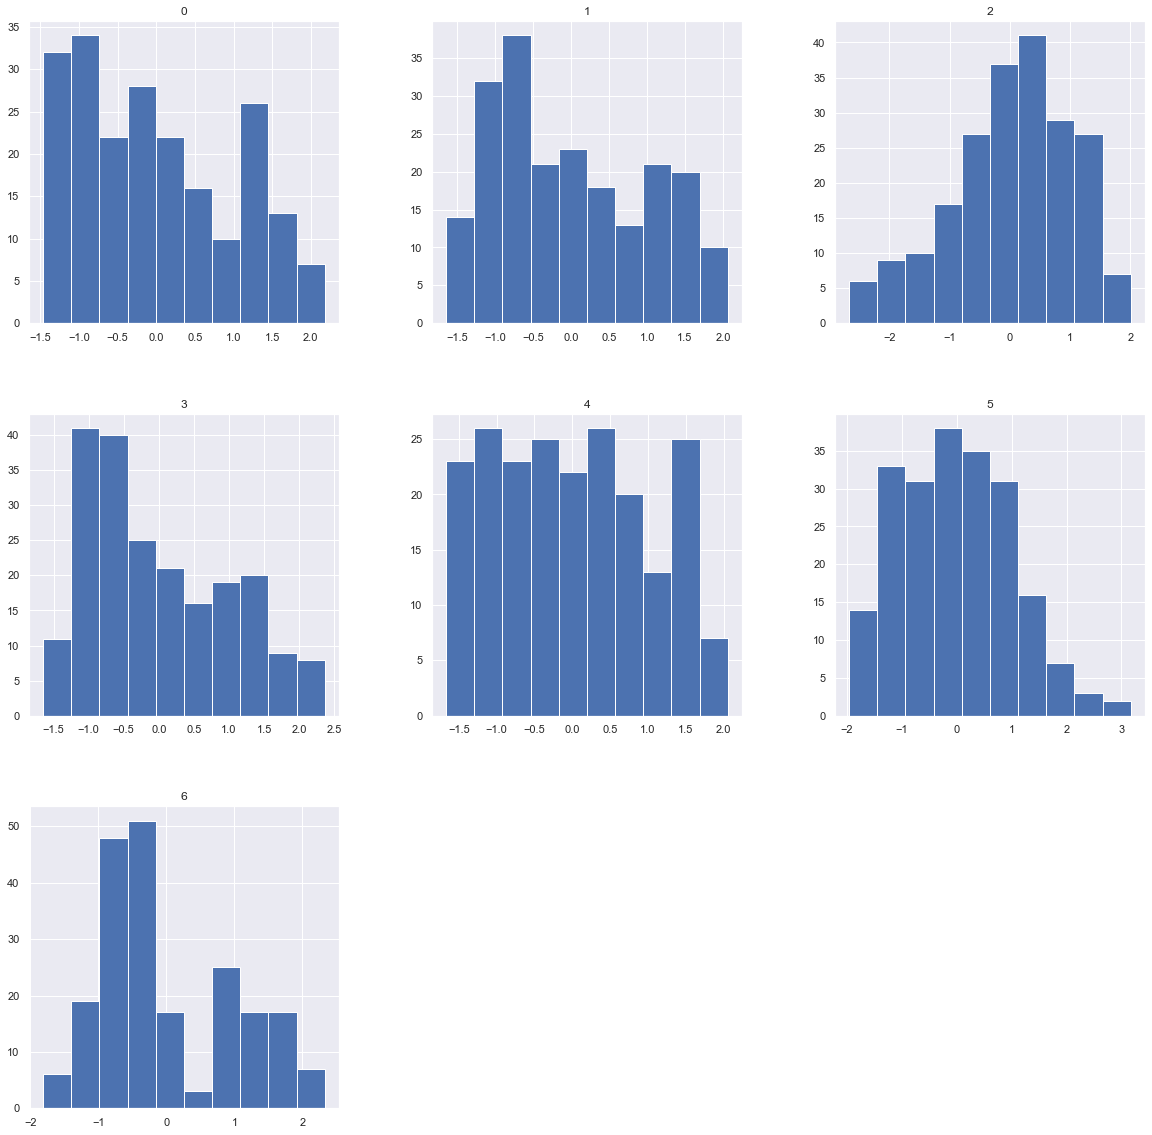

In [21]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [22]:
#Evaluation metric for 13 algorithms

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results_no_noise={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_no_noise[i]=cv_results.mean()

 LR: 0.932949 (+/- 0.062061)
LDA: 0.964463 (+/- 0.045036)
kNN: 0.931205 (+/- 0.053813)
 DT: 0.914715 (+/- 0.050051)
 NB: 0.901223 (+/- 0.067870)
SVM: 0.926197 (+/- 0.057565)
 RF: 0.925769 (+/- 0.055237)
 GB: 0.937536 (+/- 0.045871)
XGB: 0.930766 (+/- 0.047681)
AdaBoost: 0.605332 (+/- 0.085529)
ANN: 0.918732 (+/- 0.060521)


In [23]:
# Multiple results from cross validation for statistical tests

In [24]:
# Create a function that assembles cross validation results  
def cv_res (results):  
    
    a = [5,10,15,20,25,30,35,40,45,50]

    x = []

    sum = 0

    for i , result in enumerate(results):
       
        sum += result

        if i+1 in a: 
            x.append(sum/5)
            sum=0
    return x

In [25]:
m =[]
for i in models:
    m.append(i[0])

f1_results = pd.DataFrame()


for i, m in enumerate(m):
    f1_results[str(m)] = cv_res(results[i])

f1_results    

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.952283,0.980855,0.961709,0.933138,0.915342,0.952741,0.980855,0.933040,0.951886,0.622513,0.932839
1,0.911471,0.951502,0.900820,0.912662,0.900039,0.890008,0.902454,0.921679,0.912204,0.596966,0.900820
2,0.931282,0.961758,0.902662,0.891922,0.894035,0.912186,0.903834,0.913010,0.913309,0.566015,0.912186
3,0.931722,0.971380,0.952186,0.902564,0.904298,0.952234,0.923852,0.952692,0.952283,0.656821,0.924249
4,0.941074,0.961807,0.923394,0.923278,0.864273,0.932332,0.903931,0.961709,0.932692,0.614510,0.932967
5,0.921728,0.970647,0.932405,0.912912,0.919312,0.912393,0.950427,0.932503,0.932357,0.603254,0.902680
6,0.941459,0.971331,0.941410,0.891910,0.874052,0.922314,0.912265,0.941758,0.922314,0.637271,0.922485
7,0.932405,0.952063,0.923339,0.933138,0.923443,0.932454,0.923901,0.952283,0.924023,0.546892,0.913864
8,0.932662,0.961581,0.961758,0.931935,0.932863,0.942015,0.961758,0.942711,0.961758,0.610234,0.932863
9,0.933406,0.961709,0.912367,0.913694,0.884573,0.913297,0.894407,0.923974,0.904835,0.598841,0.912367


In [26]:
# Initial results without the AdaBoost algorithm
f1_results_other_algorithms=f1_results.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_other_algorithms

0    0.949469
1    0.910366
2    0.913618
3    0.936746
4    0.927746
5    0.928736
6    0.924130
7    0.931092
8    0.946190
9    0.915463
dtype: float64

## Noise without noisify 

In [27]:
# Create a function to add noise    
def add_noise(X,p):
    if p>0:
        X_n = pd.DataFrame(X)
        a,b = X.shape
        c = round(a*p)

        for k in range(b):
            mean = X_n[k].mean()
            sd = X_n[k].std()

            for i in range(0,a,int(a/c)):
                X_n.iloc[i,k] = np.random.normal(mean,sd)

        return X_n.values

    else:
        return X

#### Add noise 5%

In [28]:
X2_noise1 = add_noise(X_scaled, p=0.05)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_1={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise1, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_1[i]=cv_results.mean()

 LR: 0.906102 (+/- 0.068063)
LDA: 0.931804 (+/- 0.055691)
kNN: 0.898351 (+/- 0.067215)
 DT: 0.864720 (+/- 0.056912)
 NB: 0.864458 (+/- 0.075261)
SVM: 0.894009 (+/- 0.063452)
 RF: 0.894653 (+/- 0.064883)
 GB: 0.896300 (+/- 0.061186)
XGB: 0.895307 (+/- 0.056467)
AdaBoost: 0.807675 (+/- 0.111939)
ANN: 0.888563 (+/- 0.071332)


In [30]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_1 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_1[str(m)] = cv_res(results[i])

f1_results_noise_1

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.932673,0.942363,0.932442,0.867241,0.876367,0.913346,0.924023,0.894799,0.903394,0.756122,0.903474
1,0.872008,0.921380,0.861198,0.865006,0.851264,0.881264,0.862966,0.911886,0.892106,0.775110,0.859098
2,0.902662,0.904023,0.853010,0.844725,0.864383,0.892912,0.883217,0.883895,0.874371,0.857147,0.892405
3,0.922534,0.942821,0.924865,0.876593,0.856764,0.912961,0.895976,0.887386,0.905818,0.805783,0.886947
4,0.912912,0.980855,0.905488,0.894499,0.874420,0.905104,0.913394,0.924756,0.922564,0.785098,0.915061
5,0.883358,0.893773,0.883907,0.846960,0.861168,0.872307,0.894042,0.854982,0.857682,0.771050,0.861944
6,0.910799,0.960952,0.882594,0.860342,0.826006,0.873254,0.881078,0.901807,0.874408,0.845397,0.874683
7,0.913944,0.914774,0.913944,0.866129,0.903980,0.895140,0.875647,0.895189,0.923663,0.859344,0.904469
8,0.914628,0.942314,0.941807,0.872160,0.884585,0.920277,0.961709,0.933040,0.923468,0.852386,0.903297
9,0.895500,0.914786,0.884254,0.853546,0.845641,0.873527,0.854474,0.875263,0.875598,0.769311,0.884254


In [31]:
# Results with noise 5% without the AdaBoost algorithm
f1_results_noise_1_other_algorithms=f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_1_other_algorithms

0    0.909012
1    0.877818
2    0.879560
3    0.901267
4    0.914905
5    0.871012
6    0.884592
7    0.900688
8    0.919728
9    0.875684
dtype: float64

#### Add noise 10%

In [32]:
X2_noise2 = add_noise(X_scaled,p=.1)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_2={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_2[i]=cv_results.mean()

 LR: 0.844563 (+/- 0.074280)
LDA: 0.865302 (+/- 0.068087)
kNN: 0.835989 (+/- 0.074226)
 DT: 0.783080 (+/- 0.086834)
 NB: 0.804357 (+/- 0.078845)
SVM: 0.835755 (+/- 0.076082)
 RF: 0.838014 (+/- 0.065070)
 GB: 0.815357 (+/- 0.068601)
XGB: 0.825952 (+/- 0.057721)
AdaBoost: 0.771664 (+/- 0.118273)
ANN: 0.835000 (+/- 0.073410)


In [34]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_2 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_2[str(m)] = cv_res(results[i])

f1_results_noise_2

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.853236,0.893973,0.846038,0.750120,0.792597,0.852820,0.834422,0.806935,0.804019,0.770519,0.844592
1,0.845226,0.844276,0.818070,0.806409,0.808394,0.826526,0.816439,0.816905,0.817698,0.758736,0.828608
2,0.856105,0.864072,0.788706,0.755027,0.798541,0.799261,0.798054,0.796612,0.807429,0.787662,0.826557
3,0.843296,0.884212,0.876434,0.799878,0.827484,0.875342,0.858132,0.829476,0.848150,0.743945,0.857448
4,0.846602,0.893376,0.857939,0.829798,0.813444,0.855865,0.846204,0.846539,0.837125,0.731974,0.866516
5,0.836196,0.837698,0.806783,0.748950,0.774160,0.807944,0.833187,0.802395,0.804228,0.774962,0.805178
6,0.881269,0.920322,0.855255,0.776416,0.834956,0.853059,0.884200,0.834809,0.865250,0.749337,0.863394
7,0.779212,0.800970,0.799176,0.785139,0.786563,0.772424,0.818046,0.752669,0.800128,0.744680,0.791569
8,0.846684,0.865633,0.845249,0.770458,0.788381,0.865915,0.863686,0.847594,0.846215,0.834703,0.827326
9,0.857808,0.848486,0.866245,0.808602,0.819054,0.848394,0.827766,0.819634,0.829278,0.820117,0.838810


In [35]:
f1_results_noise_2_other_algorithms=f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_2_other_algorithms

0    0.827875
1    0.822855
2    0.809036
3    0.849985
4    0.849341
5    0.805672
6    0.856893
7    0.788590
8    0.836714
9    0.836408
dtype: float64

#### Add noise 15%

In [36]:
X2_noise3 = add_noise(X_scaled,p=.15)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_3={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_3[i]=cv_results.mean()

 LR: 0.731075 (+/- 0.099794)
LDA: 0.736642 (+/- 0.093403)
kNN: 0.749715 (+/- 0.079637)
 DT: 0.723814 (+/- 0.090191)
 NB: 0.732291 (+/- 0.082749)
SVM: 0.756677 (+/- 0.085361)
 RF: 0.748323 (+/- 0.077838)
 GB: 0.745920 (+/- 0.085962)
XGB: 0.752486 (+/- 0.091859)
AdaBoost: 0.698754 (+/- 0.103725)
ANN: 0.739636 (+/- 0.099465)


In [38]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_3 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_3[str(m)] = cv_res(results[i])

f1_results_noise_3

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.713341,0.727202,0.782556,0.755670,0.734932,0.764903,0.762834,0.744373,0.742804,0.688362,0.725669
1,0.755543,0.735804,0.728129,0.704931,0.737368,0.749358,0.757679,0.727663,0.767558,0.739636,0.745903
2,0.722625,0.713590,0.702650,0.699860,0.715598,0.712142,0.693022,0.728240,0.709135,0.652515,0.723700
3,0.763126,0.761940,0.790412,0.723560,0.771077,0.789590,0.782730,0.754048,0.781893,0.739492,0.782502
4,0.750832,0.780530,0.770840,0.774322,0.724042,0.803558,0.763344,0.794182,0.752983,0.681054,0.745674
5,0.683078,0.684202,0.687465,0.724132,0.722210,0.721504,0.725983,0.724285,0.752108,0.654127,0.733096
6,0.777770,0.799261,0.780127,0.701502,0.756906,0.795661,0.753724,0.779927,0.761868,0.699678,0.795466
7,0.686421,0.676844,0.717633,0.695374,0.704940,0.704646,0.716285,0.700733,0.755946,0.694228,0.698187
8,0.724401,0.734093,0.786052,0.764361,0.735504,0.752870,0.806487,0.753905,0.730471,0.735344,0.722400
9,0.733614,0.752956,0.751287,0.694427,0.720331,0.772540,0.721137,0.751843,0.770097,0.703100,0.723761


In [39]:
## Results with noise 15% without the AdaBoost algorithm
f1_results_noise_3_other_algorithms=f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_3_other_algorithms

0    0.745429
1    0.740994
2    0.712056
3    0.770088
4    0.766031
5    0.715806
6    0.770221
7    0.705701
8    0.751054
9    0.739199
dtype: float64

#### Add noise 20%

In [40]:
X2_noise4 = add_noise(X_scaled,p=.2)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_4={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise4, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_4[i]=cv_results.mean()

 LR: 0.690667 (+/- 0.105142)
LDA: 0.701059 (+/- 0.102452)
kNN: 0.698186 (+/- 0.085429)
 DT: 0.658876 (+/- 0.093833)
 NB: 0.673513 (+/- 0.095931)
SVM: 0.706470 (+/- 0.098975)
 RF: 0.699381 (+/- 0.091297)
 GB: 0.702289 (+/- 0.089363)
XGB: 0.701909 (+/- 0.096771)
AdaBoost: 0.656106 (+/- 0.079231)
ANN: 0.697300 (+/- 0.096513)


In [42]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_4 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_4[str(m)] = cv_res(results[i])

f1_results_noise_4

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.705221,0.704681,0.719259,0.641055,0.694319,0.744921,0.678840,0.697632,0.688332,0.669285,0.673428
1,0.706850,0.715952,0.694473,0.709390,0.660245,0.692443,0.729756,0.736991,0.758390,0.611222,0.690067
2,0.644101,0.670842,0.620706,0.601263,0.636979,0.635231,0.612091,0.646791,0.632935,0.625883,0.684215
3,0.714495,0.726566,0.747568,0.682507,0.699213,0.776660,0.769550,0.758827,0.758831,0.681940,0.719257
4,0.713930,0.735836,0.733256,0.662061,0.706576,0.739702,0.733293,0.702420,0.720216,0.660921,0.764555
5,0.677778,0.668639,0.678909,0.655456,0.656615,0.698673,0.693926,0.689965,0.635360,0.639047,0.650167
6,0.719116,0.720428,0.712473,0.696507,0.673122,0.750481,0.715080,0.703114,0.744274,0.662166,0.730885
7,0.661554,0.691688,0.677909,0.609825,0.681505,0.643645,0.694376,0.652907,0.676441,0.645560,0.687633
8,0.677781,0.681572,0.703367,0.679190,0.683521,0.713795,0.707684,0.742106,0.724236,0.706790,0.697554
9,0.685846,0.694385,0.693937,0.651507,0.643033,0.669148,0.659217,0.692132,0.680071,0.658242,0.675242


In [43]:
## Results with noise 20% without the AdaBoost algorithm
f1_results_noise_4_other_algorithms=f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_4_other_algorithms

0    0.694769
1    0.709456
2    0.638515
3    0.735347
4    0.721185
5    0.670549
6    0.716548
7    0.667748
8    0.701080
9    0.674452
dtype: float64

In [44]:
f1_consolidated_results2 = pd.DataFrame()
f1_consolidated_results2 = f1_consolidated_results2.append(results_no_noise, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_1, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_2, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_3, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_4, ignore_index=True)

In [45]:
new_column_values = ['Without Noise','Noise 5%','Noise 10%','Noise 15%','Noise 20%']

f1_consolidated_results2 ["Status"] = new_column_values 

f1_consolidated_results2 

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN,Status
0,0.932949,0.964463,0.931205,0.914715,0.901223,0.926197,0.925769,0.937536,0.930766,0.605332,0.918732,Without Noise
1,0.906102,0.931804,0.898351,0.864720,0.864458,0.894009,0.894653,0.896300,0.895307,0.807675,0.888563,Noise 5%
2,0.844563,0.865302,0.835989,0.783080,0.804357,0.835755,0.838014,0.815357,0.825952,0.771664,0.835000,Noise 10%
3,0.731075,0.736642,0.749715,0.723814,0.732291,0.756677,0.748323,0.745920,0.752486,0.698754,0.739636,Noise 15%
4,0.690667,0.701059,0.698186,0.658876,0.673513,0.706470,0.699381,0.702289,0.701909,0.656106,0.697300,Noise 20%


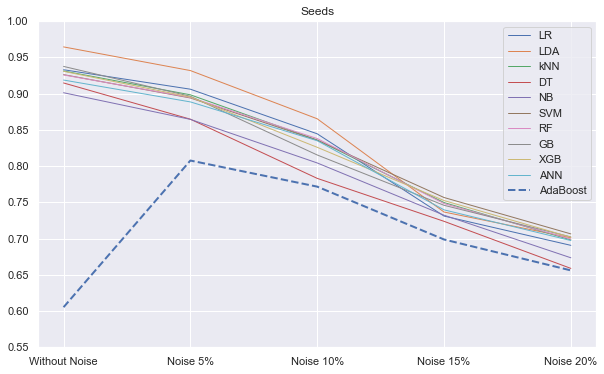

In [46]:
# Importing packages
import matplotlib.pyplot as plt

# Plot a simple line chart
fig, g = plt.subplots(figsize = (10,6))

sns.color_palette("rocket", as_cmap=True)
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2.drop(columns=['Status','AdaBoost'],axis=1),linewidth=1)
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2['AdaBoost'],'--',linewidth=2)
plt.legend(['LR','LDA','kNN','DT','NB','SVM','RF','GB','XGB','ANN', 'AdaBoost'])
#plt.legend(f1_consolidated_results2['AdaBoost']),loc="upper right")
plt.ylim(0.55,1)
plt.title("Seeds")
plt.savefig('Seeds.png', dpi = 300 ,transparent = True)
plt.show()

### T-test Statistic 

In [47]:
from scipy.stats import ttest_ind as ttest

Hypothesis

H0: Noise does not effect the models efficiency f1_no_noise = f1_noise

H1: There is effect of noise in the models efficiency f1_no_noise <> f1_noise

#### T-test for data without noise

In [48]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -29.598655
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 5% noise

#### Compare with initial results

In [49]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_1['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -12.205193
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [50]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_1_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 4.990680
p-value for two tailed test is 0.000095
Since p-value(=0.000095) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 10% noise

#### Compare with initial results

In [51]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_2['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -11.306011
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other algorithms

In [52]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_2_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 12.328002
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 15% noise

#### Compare with initial results

In [53]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_3['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -6.531422
p-value for two tailed test is 0.000004
Since p-value(=0.000004) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [54]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_3_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 21.587158
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 20% noise

#### Compare with initial results

In [55]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_4['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -3.813182
p-value for two tailed test is 0.001273
Since p-value(=0.001273) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [56]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_4_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 22.907824
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


## Cohen's d effect

In [57]:
import math 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
# calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

#### Cohen's d without noise

In [58]:
cohend(f1_results['AdaBoost'].tolist(), f1_results_other_algorithms.tolist())

-13.236921062877457

In [59]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -29.598655
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Cohen's d with 20% noise

In [60]:
cohend(f1_results_noise_4['AdaBoost'].tolist(), f1_results_noise_4_other_algorithms.tolist())

-1.2880350097732893

In [61]:
t_value,p_value=ttest(f1_results_noise_4['AdaBoost'],f1_results_noise_4_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -2.880134
p-value for two tailed test is 0.009964
Since p-value(=0.009964) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### Kolmogorov-Smirnov 

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.

greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.

In [62]:
# Hypothesis

# H0: Noise does not effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB = f1_noise_mean_of_the_rest

# H1:  Noise does effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB <> f1_noise_mean_of_the_rest



### K-S for 5% noise

In [63]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_1['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.000011
Since p-value(=0.000011) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### K-S for 10% noise

In [64]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_2['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.000011
Since p-value(=0.000011) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### K-S for 15% noise

In [65]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_3['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.000011
Since p-value(=0.000011) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### K-S for 20% noise

In [66]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_4['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


p-value for two tailed KS test is 0.000011
Since p-value(=0.000011) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


## Pearson correlation 

#### Adaboost Table

In [67]:
#create table
d1 = {
    'AdaBoost_initial': f1_results['AdaBoost'],
    'AdaBoost_noise_1': f1_results_noise_1['AdaBoost'],
    'AdaBoost_noise_2': f1_results_noise_2['AdaBoost'],
    'AdaBoost_noise_3': f1_results_noise_3['AdaBoost'],
    'AdaBoost_noise_4': f1_results_noise_4['AdaBoost']
    }
Adaboost_table = pd.DataFrame(d1)
Adaboost_table

,AdaBoost_initial,AdaBoost_noise_1,AdaBoost_noise_2,AdaBoost_noise_3,AdaBoost_noise_4
0,0.622513,0.756122,0.770519,0.688362,0.669285
1,0.596966,0.775110,0.758736,0.739636,0.611222
2,0.566015,0.857147,0.787662,0.652515,0.625883
3,0.656821,0.805783,0.743945,0.739492,0.681940
4,0.614510,0.785098,0.731974,0.681054,0.660921
5,0.603254,0.771050,0.774962,0.654127,0.639047
6,0.637271,0.845397,0.749337,0.699678,0.662166
7,0.546892,0.859344,0.744680,0.694228,0.645560
8,0.610234,0.852386,0.834703,0.735344,0.706790
9,0.598841,0.769311,0.820117,0.703100,0.658242


In [68]:
# Correlation between f1score of Adaboost and noise increase 

a = Adaboost_table.iloc[:,:1].squeeze()
     
b = Adaboost_table['AdaBoost_noise_1'].squeeze()

c = Adaboost_table['AdaBoost_noise_2'].squeeze()
  
d = Adaboost_table['AdaBoost_noise_3'].squeeze()    

e = Adaboost_table['AdaBoost_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)



noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)

df_cor = pd.concat([f1,noise], axis=1)

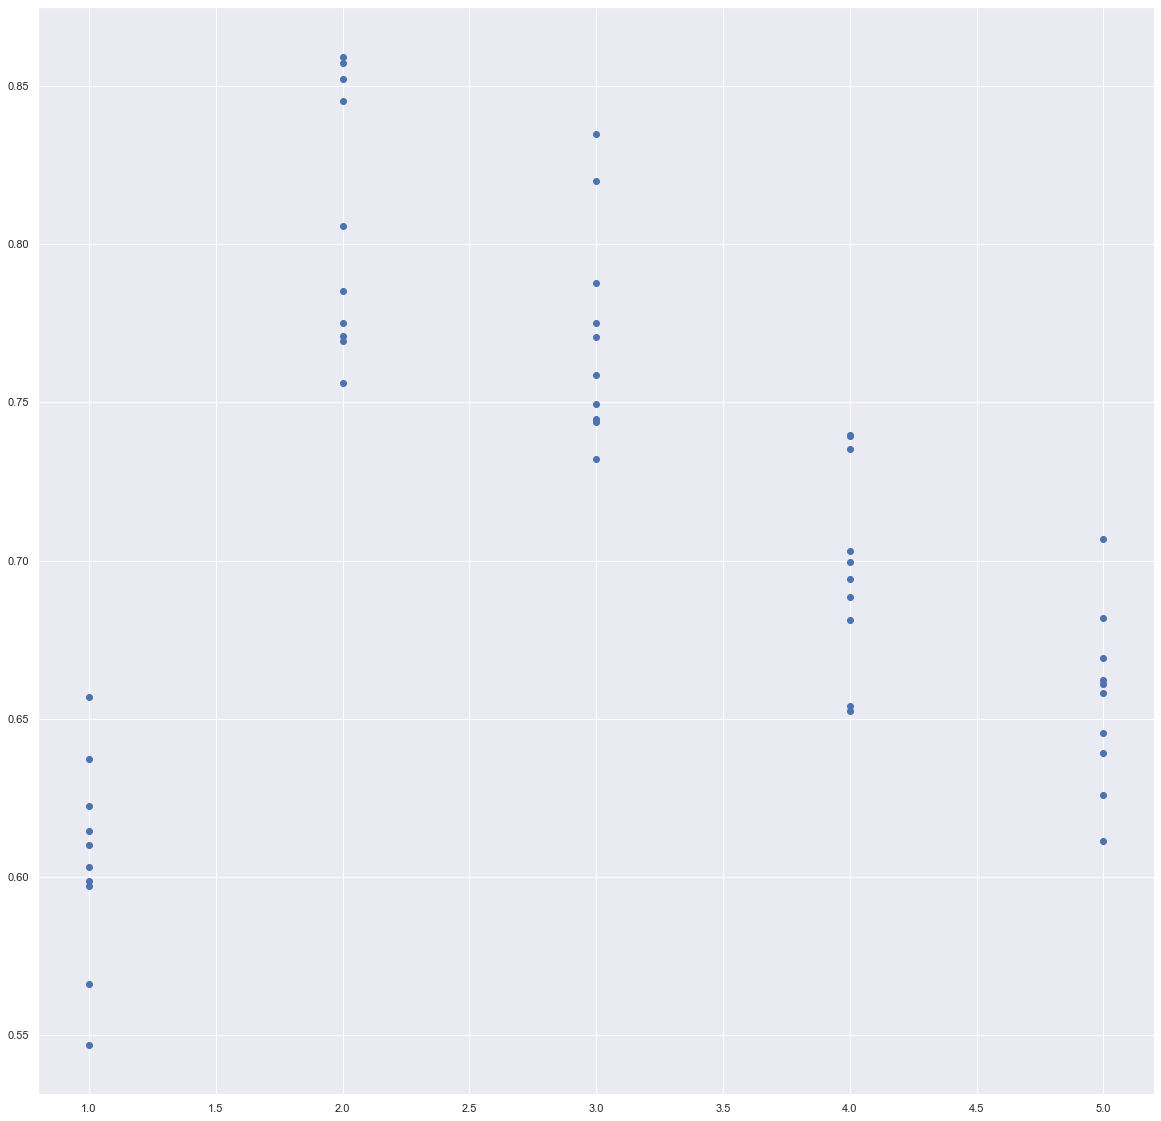

In [69]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [70]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.928880) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that there is not correlation at 0.05 level of significance.
-0.01294945289397104


In [71]:
#create table
d2 = {
    'Other_Algorithms_initial': f1_results_other_algorithms,
    'Other_Algorithms_noise_1': f1_results_noise_1_other_algorithms,
    'Other_Algorithms_noise_2': f1_results_noise_2_other_algorithms,
    'Other_Algorithms_noise_3': f1_results_noise_3_other_algorithms,
    'Other_Algorithms_noise_4': f1_results_noise_4_other_algorithms
    }
Other_Algorithms_table = pd.DataFrame(d2)
Other_Algorithms_table

,Other_Algorithms_initial,Other_Algorithms_noise_1,Other_Algorithms_noise_2,Other_Algorithms_noise_3,Other_Algorithms_noise_4
0,0.949469,0.909012,0.827875,0.745429,0.694769
1,0.910366,0.877818,0.822855,0.740994,0.709456
2,0.913618,0.879560,0.809036,0.712056,0.638515
3,0.936746,0.901267,0.849985,0.770088,0.735347
4,0.927746,0.914905,0.849341,0.766031,0.721185
5,0.928736,0.871012,0.805672,0.715806,0.670549
6,0.924130,0.884592,0.856893,0.770221,0.716548
7,0.931092,0.900688,0.788590,0.705701,0.667748
8,0.946190,0.919728,0.836714,0.751054,0.701080
9,0.915463,0.875684,0.836408,0.739199,0.674452


In [72]:
# Correlation between f1score of Other algorithms mean value and noise increase 

a = Other_Algorithms_table.iloc[:,:1].squeeze()
     
b = Other_Algorithms_table['Other_Algorithms_noise_1'].squeeze()

c = Other_Algorithms_table['Other_Algorithms_noise_2'].squeeze()
  
d = Other_Algorithms_table['Other_Algorithms_noise_3'].squeeze()    

e = Other_Algorithms_table['Other_Algorithms_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)


noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)


df_cor = pd.concat([f1,noise], axis=1)

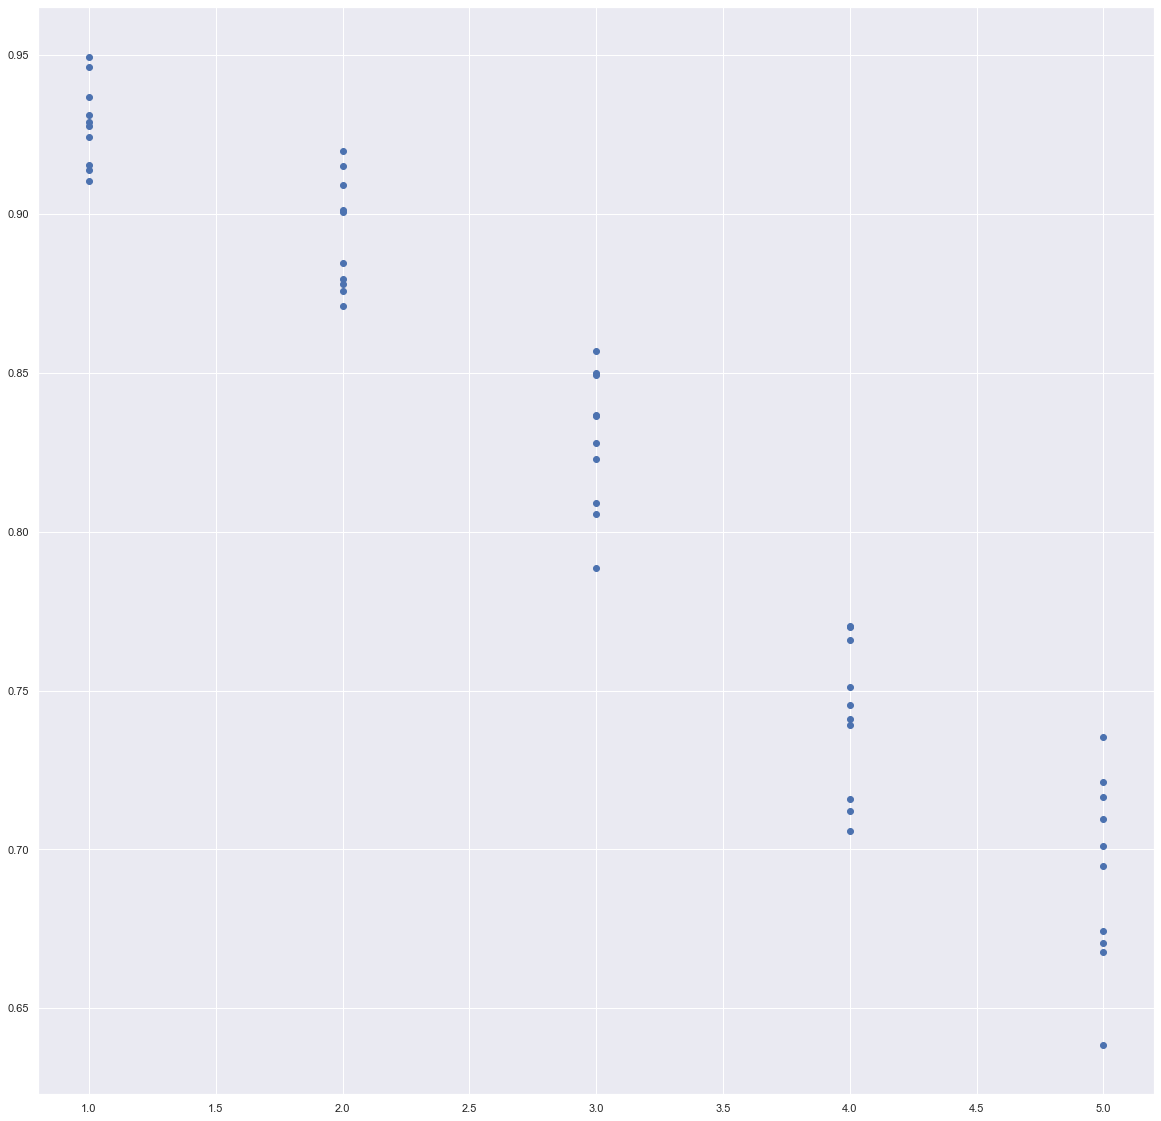

In [73]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [74]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.97 at 0.05 level of significance.
-0.9650220308222967
